# Understanding Genetic Algorithms

Genetic Algorithms are:
1. General Purpose optimization programs
2. They are useful when little is known about a problem, when one is dealing with non linear problem or when searching a brute force solution in a large search space
3. They belong to the class of evolutionary algorithms because they mimic the natural selection Darwinian process

The genetic algorithms **optimize**.
To simply we have certain set of conditions and alternatives, the algorithm optimize for a certain condition. The algorithm will only optimize for the options provided. Unlike the exhaustive brute force method they do not try every possible alternative. Intead these algorithms grade solutions and make educated gusses going forward. A simple example if the warmer/colder game that is played, where you store something and the objective is to identify that item. The cue of warmer will increase as one goes closer to the hidden object. 
The basic algorithm process is as follows:
1. Randomly generate a population of solutions
2. Measure the fitness of each solution
3. Select the best solution and discard the rest
4. Cross Over (Recombine) elements in the best solution to make new solutions
5. Mutate a small number of elements in the solution by changing their value
6. Stop the algorithm when the stop condition is reached (Finding a known answer, finding a good enough answer (based on a minimum threshold), completing a set of iterations or reaching a time deadline)

## Problem Statement: Using genetic algorithm product a population of rats with an average wright of 110 pounds from an initial population weighing much less than that

In [36]:
# entering data and assumptions

import time
import statistics
import random

#adding constants required for the calculations

GOAL=50000
NUM_RATS=20
INITIAL_MIN_WT=200
INITIAL_MAX_WT=600
INITIAL_MODE_WT=300
MUTATE_ODDS=0.01 #ie. the chance of mutation is 1 in 100
MUTATE_MIN=0.5
MUTATE_MAX=1.2
LITTER_SIZE=8
LITTERS_PER_YEAR=10
GENERATION_LIMIT=500

# making sure that even number of rats are needed for the breeding pairs
if NUM_RATS % 2 !=0:
    NUM_RATS+=1

In [37]:
# initializing the population
def populate(num_rats, min_wt, max_wt, mode_wt):
    return [int(random.triangular(min_wt, max_wt, mode_wt)) for i in range(num_rats)]

Here we are using triangular distribution, this type of distribution is used in the cases where we do not know about the distribution as such but we have a knowldege about the limits and mode. The random.triangular module produces a random distribution whose values lie within min and max values and these values are closure to the mode value.

In [38]:
#usage of the populate function (rough work)
#lets say instead of rats we want to show a random distribution of Indian male heights
#the arguments in the function are caliberated 

population=populate(num_rats=10, min_wt=152.4, max_wt=231, mode_wt=162)
print(population)

[164, 165, 212, 170, 217, 191, 175, 207, 194, 176]


In [39]:
#measuring the fitness of the population

def fitness(population, goal):
    ''' Function derives the criteria on the basis of which the population of rats are culled
    The experiment will be successful when the returned argument will become 1.'''
    avg = statistics.mean(population)
    return avg/goal

In [40]:
#eg of fitness
fitness(population,243 ) #243 in 8ft in cms 

0.7699588477366255

In [52]:
def select(population, to_retain):
    '''Culling a population to retain only a specific number of members'''
    sorted_population=sorted(population)
    to_retain_by_sex=to_retain//2
    #we are assuming that half of the population is females and half is males. 
    #the lower half is the female population and the other half is male population
    members_per_sex=len(population)//2
    females=sorted_population[:members_per_sex] #separating female and male population
    males=sorted_population[members_per_sex:]
    selected_females=females[-to_retain_by_sex:] #taking the defined numbers of max wt.
    selected_males=males[-to_retain_by_sex:]
    return selected_males, selected_females

In [42]:
#breeding a new generation
def breed(male, female, litter_size):
    ''' Cross over genese among members (weights) of a population'''
    random.shuffle(male)
    random.shuffle(female)
    children=[]
    for male, female in zip(male, female):
        for child in range(litter_size):    #for populating all child as per the litter size
            child= random.randint(female, male) # randint takes (low, high) value and hence famale, male is added
            children.append(child)
    return children

### Why have we used zip?

Zip essentially combines the two data sets and outputs a combined object.

In [43]:
list1=['apple', 'banana', 'pineapple']
list2=[1,2,3]
list3= zip(list1, list2)
list4=zip(list1, list2)
#the list3 object returns the location of the combined object.
#to get the values of the iterable we need to specify the type of the iterable
print(list3), print(list(list3))

#we can also using other data structures such as sets, dictionary for printing the values

print(tuple(list4))

[('apple', 1), ('banana', 2), ('pineapple', 3)]
(('apple', 1), ('banana', 2), ('pineapple', 3))


### Mutating the population

The population will be mutated after every reproduction cycle. We need to include that in the weight assignment of the children as obtained in the previous step. Here, randomness is added by comparing the odds of mutation with random number, and accordingly updating the weights of the rats by further selecting a random number between a max permissible mutation and minimum permissible mutation.

In [44]:
def mutate(children, mutate_odds, mutate_min, mutate_max):
    '''adding mutations to the children weights'''
    for idx, wt_rats in enumerate(children):
        if mutate_odds >= random.random():
            children[idx] = round(wt_rats * random.uniform(mutate_min, mutate_max))
    return children

### Why have we used enumerate?

Enumerate is used to print, iterate over both the index and the value pair. This can also be accomplished using the range(len(list)) option but the enumerate method is pythonic. Enumerate works with every iterable while the range only works with countable, indexable object. Also, range gives the results just the index while enumerate give the result of both index and value .

In [45]:

#using range
ran_list1=['apple','potato','banana']
print(range(len(ran_list1)))
start_time=time.time()
for i in range(len(ran_list1)):
    print(f"The index is {i}")
    print(f"The value is {ran_list1[i]}")
end_time=time.time()
print(f"The time taken for the code to run is:{str(end_time-start_time)} seconds")

range(0, 3)
The index is 0
The value is apple
The index is 1
The value is potato
The index is 2
The value is banana
The time taken for the code to run is:4.601478576660156e-05 seconds


In [46]:

#using enumerate

print(enumerate(ran_list1))
start_time=time.time()
for index, value in enumerate(ran_list1):
    print(f"The index is {index}")
    print(f"The value is {value}")
end_time=time.time()
print(f"The time taken for the code to run is: {str(end_time-start_time)} seconds")

The index is 0
The value is apple
The index is 1
The value is potato
The index is 2
The value is banana
The time taken for the code to run is: 4.696846008300781e-05 seconds


The above example shows that the same functionality can be represented in different manners, but the enumerate way is clearner and more pythonic.

### Defining the main function

In [74]:
def main():
    ''' Initializing population, select, breed, mutate and display results'''
    #figuring out the 1st generation
    generations = 0
    parents = populate(NUM_RATS, INITIAL_MIN_WT, INITIAL_MAX_WT, INITIAL_MODE_WT)
    print(f"The initial population wt is {parents}")
    pop1_fitness = fitness(parents, GOAL)
    print(f"The initial population fitness is: {pop1_fitness}")
    print(f"The initial number of rats is: {NUM_RATS}")
    
    ave_wt = []
    
    while pop1_fitness < 1 and generations < GENERATION_LIMIT:
        selected_males, selected_females = select(parents, NUM_RATS)
        children = breed(selected_males, selected_females, LITTER_SIZE)
        children = mutate(children, MUTATE_ODDS, MUTATE_MIN, MUTATE_MAX)
        parents = selected_males + selected_females + children
        pop1_fitness = fitness(parents, GOAL)
        print(f"Generation {generations} fitness {pop1_fitness:.4}")
        ave_wt.append(int(statistics.mean(parents)))
        generations+=1
    print(f"average wt per generation {ave_wt}")
    print(f"\n Number of generations {generations}")
    print(f"number of years: {int(generations/LITTERS_PER_YEAR)}")
    plt.plot(ave_wt, color='r')
    plt.xlabel("Generations")
    plt.ylabel("Avg wt")
    plt.title("Generations vs avg_wt")

The initial population wt is [454, 360, 238, 360, 312, 280, 399, 326, 349, 409, 449, 380, 399, 530, 445, 236, 434, 235, 371, 320]
The initial population fitness is: 0.007286
The initial number of rats is: 20
Generation 0 fitness 0.00722
Generation 1 fitness 0.008214
Generation 2 fitness 0.009012
Generation 3 fitness 0.009484
Generation 4 fitness 0.009757
Generation 5 fitness 0.01002
Generation 6 fitness 0.01039
Generation 7 fitness 0.01054
Generation 8 fitness 0.01063
Generation 9 fitness 0.01076
Generation 10 fitness 0.01083
Generation 11 fitness 0.01095
Generation 12 fitness 0.01112
Generation 13 fitness 0.01117
Generation 14 fitness 0.01132
Generation 15 fitness 0.01144
Generation 16 fitness 0.01147
Generation 17 fitness 0.01158
Generation 18 fitness 0.01183
Generation 19 fitness 0.01213
Generation 20 fitness 0.01241
Generation 21 fitness 0.01255
Generation 22 fitness 0.01279
Generation 23 fitness 0.01286
Generation 24 fitness 0.0129
Generation 25 fitness 0.01295
Generation 26 fitne

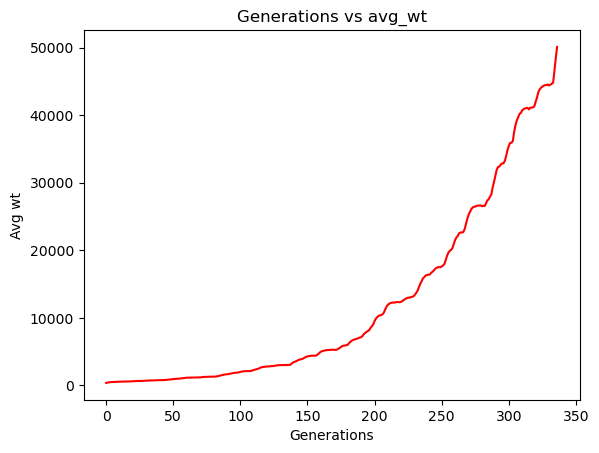

In [75]:
if __name__=="__main__":
    start_time = time.time()
    main()
    end_time=time.time()
    print(f"\n The runtime of the program is {end_time-start_time}")